In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from sklearn.feature_selection import mutual_info_classif

In [2]:
data = pd.read_csv("DNN_Data_2017_2021_MIN.csv", parse_dates = ["time"], index_col = "time")

In [3]:
data.drop(['o','h','l','volume','complete'],axis=1,inplace=True)
data.rename(columns={'c':'Close_Price'},inplace=True)
symbol = 'Close_Price' 

In [4]:
data

,Close_Price
time,
2017-01-02 23:00:00,1.04698
2017-01-02 23:01:00,1.04707
2017-01-02 23:02:00,1.04691
2017-01-02 23:03:00,1.04692
2017-01-02 23:04:00,1.04669
...,...
2021-12-30 23:55:00,1.13244
2021-12-30 23:56:00,1.13233
2021-12-30 23:57:00,1.13232


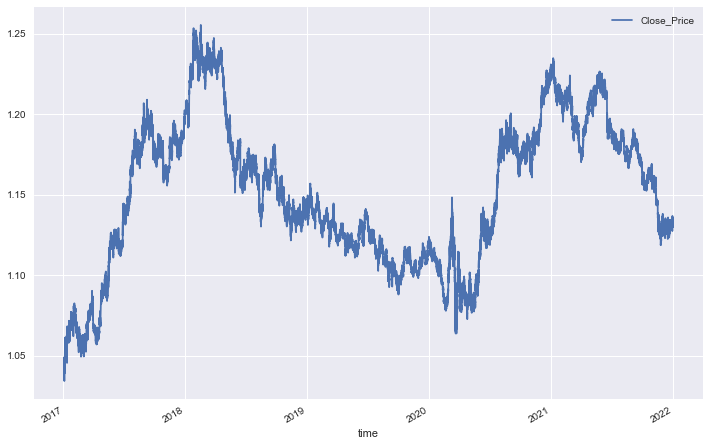

In [5]:
data.plot(figsize = (12, 8))
plt.show()

In [6]:
data["returns"] = np.log(data[symbol] / data[symbol].shift())

In [7]:
data

,Close_Price,returns
time,,
2017-01-02 23:00:00,1.04698,NaN
2017-01-02 23:01:00,1.04707,0.00009
2017-01-02 23:02:00,1.04691,-0.00015
2017-01-02 23:03:00,1.04692,0.00001
2017-01-02 23:04:00,1.04669,-0.00022
...,...,...
2021-12-30 23:55:00,1.13244,-0.00002
2021-12-30 23:56:00,1.13233,-0.00010
2021-12-30 23:57:00,1.13232,-0.00001


In [8]:
window = 50

In [9]:
df = data.copy()
df["dir"] = np.where(df["returns"] > 0, 1, 0)
df["sma"] = df[symbol].rolling(window).mean() - df[symbol].rolling(150).mean()
df["boll"] = (df[symbol] - df[symbol].rolling(window).mean()) / df[symbol].rolling(window).std()
df["min"] = df[symbol].rolling(window).min() / df[symbol] - 1
df["max"] = df[symbol].rolling(window).max() / df[symbol] - 1
df["mom"] = df["returns"].rolling(3).mean()
df["vol"] = df["returns"].rolling(window).std()
df.dropna(inplace = True)

In [10]:
df

,Close_Price,returns,dir,sma,boll,min,max,mom,vol
time,,,,,,,,,
2017-01-03 01:38:00,1.04807,0.00008,1,0.00070,1.55096,-0.00135,0.00000,0.00001,0.00011
2017-01-03 01:39:00,1.04808,0.00001,1,0.00071,1.50625,-0.00136,0.00000,0.00001,0.00011
2017-01-03 01:40:00,1.04815,0.00007,1,0.00073,1.59630,-0.00143,0.00000,0.00005,0.00011
2017-01-03 01:41:00,1.04812,-0.00003,0,0.00074,1.45817,-0.00140,0.00003,0.00002,0.00010
2017-01-03 01:42:00,1.04814,0.00002,1,0.00076,1.43800,-0.00142,0.00001,0.00002,0.00010
...,...,...,...,...,...,...,...,...,...
2021-12-30 23:55:00,1.13244,-0.00002,0,-0.00013,0.33169,-0.00035,0.00019,-0.00001,0.00006
2021-12-30 23:56:00,1.13233,-0.00010,0,-0.00014,-0.23506,-0.00026,0.00028,-0.00004,0.00006
2021-12-30 23:57:00,1.13232,-0.00001,0,-0.00014,-0.27696,-0.00025,0.00029,-0.00004,0.00006


In [11]:
lags = 5

In [12]:
cols = []
features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]

In [13]:
for f in features:
        for lag in range(1, lags + 1):
            col = "{}_lag_{}".format(f, lag)
            df[col] = df[f].shift(lag)
            cols.append(col)
df.dropna(inplace = True)

In [14]:
df

,Close_Price,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-03 01:44:00,1.04804,-0.00010,0,0.00077,1.16232,-0.00133,0.00010,-0.00003,0.00011,1.00000,...,0.00002,0.00002,0.00005,0.00001,0.00001,0.00010,0.00010,0.00011,0.00011,0.00011
2017-01-03 01:45:00,1.04802,-0.00002,0,0.00078,1.07248,-0.00131,0.00012,-0.00003,0.00010,0.00000,...,-0.00003,0.00002,0.00002,0.00005,0.00001,0.00011,0.00010,0.00010,0.00011,0.00011
2017-01-03 01:46:00,1.04774,-0.00027,0,0.00079,0.40697,-0.00104,0.00039,-0.00013,0.00010,0.00000,...,-0.00003,-0.00003,0.00002,0.00002,0.00005,0.00010,0.00011,0.00010,0.00010,0.00011
2017-01-03 01:47:00,1.04763,-0.00010,0,0.00080,0.11343,-0.00094,0.00050,-0.00013,0.00010,0.00000,...,-0.00013,-0.00003,-0.00003,0.00002,0.00002,0.00010,0.00010,0.00011,0.00010,0.00010
2017-01-03 01:48:00,1.04758,-0.00005,0,0.00081,-0.05590,-0.00086,0.00054,-0.00014,0.00010,0.00000,...,-0.00013,-0.00013,-0.00003,-0.00003,0.00002,0.00010,0.00010,0.00010,0.00011,0.00010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 23:55:00,1.13244,-0.00002,0,-0.00013,0.33169,-0.00035,0.00019,-0.00001,0.00006,0.00000,...,0.00000,0.00003,0.00006,0.00012,0.00009,0.00007,0.00008,0.00008,0.00008,0.00008
2021-12-30 23:56:00,1.13233,-0.00010,0,-0.00014,-0.23506,-0.00026,0.00028,-0.00004,0.00006,0.00000,...,-0.00001,0.00000,0.00003,0.00006,0.00012,0.00006,0.00007,0.00008,0.00008,0.00008
2021-12-30 23:57:00,1.13232,-0.00001,0,-0.00014,-0.27696,-0.00025,0.00029,-0.00004,0.00006,0.00000,...,-0.00004,-0.00001,0.00000,0.00003,0.00006,0.00006,0.00006,0.00007,0.00008,0.00008


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1772057 entries, 2017-01-03 01:44:00 to 2021-12-30 23:59:00
Data columns (total 44 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Close_Price  float64
 1   returns      float64
 2   dir          int32  
 3   sma          float64
 4   boll         float64
 5   min          float64
 6   max          float64
 7   mom          float64
 8   vol          float64
 9   dir_lag_1    float64
 10  dir_lag_2    float64
 11  dir_lag_3    float64
 12  dir_lag_4    float64
 13  dir_lag_5    float64
 14  sma_lag_1    float64
 15  sma_lag_2    float64
 16  sma_lag_3    float64
 17  sma_lag_4    float64
 18  sma_lag_5    float64
 19  boll_lag_1   float64
 20  boll_lag_2   float64
 21  boll_lag_3   float64
 22  boll_lag_4   float64
 23  boll_lag_5   float64
 24  min_lag_1    float64
 25  min_lag_2    float64
 26  min_lag_3    float64
 27  min_lag_4    float64
 28  min_lag_5    float64
 29  max_lag_1    float64
 30  max_lag_2    floa

In [17]:
len(df)

1772057

In [18]:
split = int(len(df)*0.66)
split

1169557

In [19]:
train = df.iloc[:split].copy()
train

,Close_Price,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-03 01:44:00,1.04804,-0.00010,0,0.00077,1.16232,-0.00133,0.00010,-0.00003,0.00011,1.00000,...,0.00002,0.00002,0.00005,0.00001,0.00001,0.00010,0.00010,0.00011,0.00011,0.00011
2017-01-03 01:45:00,1.04802,-0.00002,0,0.00078,1.07248,-0.00131,0.00012,-0.00003,0.00010,0.00000,...,-0.00003,0.00002,0.00002,0.00005,0.00001,0.00011,0.00010,0.00010,0.00011,0.00011
2017-01-03 01:46:00,1.04774,-0.00027,0,0.00079,0.40697,-0.00104,0.00039,-0.00013,0.00010,0.00000,...,-0.00003,-0.00003,0.00002,0.00002,0.00005,0.00010,0.00011,0.00010,0.00010,0.00011
2017-01-03 01:47:00,1.04763,-0.00010,0,0.00080,0.11343,-0.00094,0.00050,-0.00013,0.00010,0.00000,...,-0.00013,-0.00003,-0.00003,0.00002,0.00002,0.00010,0.00010,0.00011,0.00010,0.00010
2017-01-03 01:48:00,1.04758,-0.00005,0,0.00081,-0.05590,-0.00086,0.00054,-0.00014,0.00010,0.00000,...,-0.00013,-0.00013,-0.00003,-0.00003,0.00002,0.00010,0.00010,0.00010,0.00011,0.00010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04 13:22:00,1.09281,-0.00030,0,-0.00010,-3.77408,0.00000,0.00092,-0.00021,0.00012,0.00000,...,-0.00018,-0.00009,-0.00004,0.00001,-0.00003,0.00012,0.00012,0.00012,0.00011,0.00011
2020-05-04 13:23:00,1.09284,0.00003,1,-0.00012,-3.19296,-0.00003,0.00090,-0.00016,0.00012,0.00000,...,-0.00021,-0.00018,-0.00009,-0.00004,0.00001,0.00012,0.00012,0.00012,0.00012,0.00011
2020-05-04 13:24:00,1.09268,-0.00015,0,-0.00014,-3.41748,0.00000,0.00104,-0.00014,0.00012,1.00000,...,-0.00016,-0.00021,-0.00018,-0.00009,-0.00004,0.00012,0.00012,0.00012,0.00012,0.00012


In [20]:
test = df.iloc[split:].copy()
test

,Close_Price,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2020-05-04 13:27:00,1.09264,0.00032,1,-0.00019,-2.33953,-0.00032,0.00108,-0.00001,0.00013,0.00000,...,-0.00017,-0.00008,-0.00014,-0.00016,-0.00021,0.00012,0.00012,0.00012,0.00012,0.00012
2020-05-04 13:28:00,1.09278,0.00013,1,-0.00021,-1.81127,-0.00045,0.00091,0.00007,0.00013,1.00000,...,-0.00001,-0.00017,-0.00008,-0.00014,-0.00016,0.00013,0.00012,0.00012,0.00012,0.00012
2020-05-04 13:29:00,1.09265,-0.00012,0,-0.00022,-2.06270,-0.00033,0.00103,0.00011,0.00013,1.00000,...,0.00007,-0.00001,-0.00017,-0.00008,-0.00014,0.00013,0.00013,0.00012,0.00012,0.00012
2020-05-04 13:30:00,1.09256,-0.00008,0,-0.00024,-2.16296,-0.00025,0.00111,-0.00002,0.00012,0.00000,...,0.00011,0.00007,-0.00001,-0.00017,-0.00008,0.00013,0.00013,0.00013,0.00012,0.00012
2020-05-04 13:31:00,1.09237,-0.00017,0,-0.00025,-2.46147,-0.00007,0.00128,-0.00013,0.00013,0.00000,...,-0.00002,0.00011,0.00007,-0.00001,-0.00017,0.00012,0.00013,0.00013,0.00013,0.00012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 23:55:00,1.13244,-0.00002,0,-0.00013,0.33169,-0.00035,0.00019,-0.00001,0.00006,0.00000,...,0.00000,0.00003,0.00006,0.00012,0.00009,0.00007,0.00008,0.00008,0.00008,0.00008
2021-12-30 23:56:00,1.13233,-0.00010,0,-0.00014,-0.23506,-0.00026,0.00028,-0.00004,0.00006,0.00000,...,-0.00001,0.00000,0.00003,0.00006,0.00012,0.00006,0.00007,0.00008,0.00008,0.00008
2021-12-30 23:57:00,1.13232,-0.00001,0,-0.00014,-0.27696,-0.00025,0.00029,-0.00004,0.00006,0.00000,...,-0.00004,-0.00001,0.00000,0.00003,0.00006,0.00006,0.00006,0.00007,0.00008,0.00008


In [25]:
train[cols]

,dir_lag_1,dir_lag_2,dir_lag_3,dir_lag_4,dir_lag_5,sma_lag_1,sma_lag_2,sma_lag_3,sma_lag_4,sma_lag_5,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-03 01:44:00,1.00000,0.00000,1.00000,1.00000,1.00000,0.00076,0.00074,0.00073,0.00071,0.00070,...,0.00002,0.00002,0.00005,0.00001,0.00001,0.00010,0.00010,0.00011,0.00011,0.00011
2017-01-03 01:45:00,0.00000,1.00000,0.00000,1.00000,1.00000,0.00077,0.00076,0.00074,0.00073,0.00071,...,-0.00003,0.00002,0.00002,0.00005,0.00001,0.00011,0.00010,0.00010,0.00011,0.00011
2017-01-03 01:46:00,0.00000,0.00000,1.00000,0.00000,1.00000,0.00078,0.00077,0.00076,0.00074,0.00073,...,-0.00003,-0.00003,0.00002,0.00002,0.00005,0.00010,0.00011,0.00010,0.00010,0.00011
2017-01-03 01:47:00,0.00000,0.00000,0.00000,1.00000,0.00000,0.00079,0.00078,0.00077,0.00076,0.00074,...,-0.00013,-0.00003,-0.00003,0.00002,0.00002,0.00010,0.00010,0.00011,0.00010,0.00010
2017-01-03 01:48:00,0.00000,0.00000,0.00000,0.00000,1.00000,0.00080,0.00079,0.00078,0.00077,0.00076,...,-0.00013,-0.00013,-0.00003,-0.00003,0.00002,0.00010,0.00010,0.00010,0.00011,0.00010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04 13:22:00,0.00000,0.00000,0.00000,1.00000,1.00000,-0.00009,-0.00008,-0.00007,-0.00007,-0.00006,...,-0.00018,-0.00009,-0.00004,0.00001,-0.00003,0.00012,0.00012,0.00012,0.00011,0.00011
2020-05-04 13:23:00,0.00000,0.00000,0.00000,0.00000,1.00000,-0.00010,-0.00009,-0.00008,-0.00007,-0.00007,...,-0.00021,-0.00018,-0.00009,-0.00004,0.00001,0.00012,0.00012,0.00012,0.00012,0.00011
2020-05-04 13:24:00,1.00000,0.00000,0.00000,0.00000,0.00000,-0.00012,-0.00010,-0.00009,-0.00008,-0.00007,...,-0.00016,-0.00021,-0.00018,-0.00009,-0.00004,0.00012,0.00012,0.00012,0.00012,0.00012


In [29]:
mu, std = train.mean(), train.std() # train set parameters (mu, std) for standardization

In [30]:
std

Close_Price   0.04620
returns       0.00013
dir           0.49913
sma           0.00063
boll          1.35445
min           0.00059
max           0.00058
mom           0.00007
vol           0.00007
dir_lag_1     0.49913
dir_lag_2     0.49913
dir_lag_3     0.49913
dir_lag_4     0.49913
dir_lag_5     0.49913
sma_lag_1     0.00063
sma_lag_2     0.00063
sma_lag_3     0.00063
sma_lag_4     0.00063
sma_lag_5     0.00063
boll_lag_1    1.35445
boll_lag_2    1.35445
boll_lag_3    1.35444
boll_lag_4    1.35444
boll_lag_5    1.35444
min_lag_1     0.00059
min_lag_2     0.00059
min_lag_3     0.00059
min_lag_4     0.00059
min_lag_5     0.00059
max_lag_1     0.00058
max_lag_2     0.00058
max_lag_3     0.00058
max_lag_4     0.00058
max_lag_5     0.00058
mom_lag_1     0.00007
mom_lag_2     0.00007
mom_lag_3     0.00007
mom_lag_4     0.00007
mom_lag_5     0.00007
vol_lag_1     0.00007
vol_lag_2     0.00007
vol_lag_3     0.00007
vol_lag_4     0.00007
vol_lag_5     0.00007
dtype: float64

In [31]:
type(mu)

pandas.core.series.Series

In [32]:
train_s = (train - mu) / std # standardization of train set features

In [33]:
train_s

,Close_Price,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-03 01:44:00,-1.98357,-0.74666,-0.94253,1.21337,0.85661,-1.39107,-0.69683,-0.48589,-0.03780,1.06097,...,0.26427,0.22014,0.70556,0.17602,0.13189,-0.05200,-0.05182,-0.04075,-0.04268,-0.01313
2017-01-03 01:45:00,-1.98400,-0.14956,-0.94253,1.22804,0.79027,-1.35876,-0.66377,-0.44178,-0.06559,-0.94253,...,-0.48590,0.26427,0.22014,0.70556,0.17602,-0.03780,-0.05200,-0.05182,-0.04075,-0.04268
2017-01-03 01:46:00,-1.99006,-2.09058,-0.94253,1.24397,0.29892,-0.90632,-0.20084,-1.76585,-0.05811,-0.94253,...,-0.44178,-0.48590,0.26427,0.22014,0.70556,-0.06559,-0.03779,-0.05200,-0.05182,-0.04075
2017-01-03 01:47:00,-1.99244,-0.82162,-0.94253,1.26275,0.08220,-0.72851,-0.01891,-1.81017,-0.09941,-0.94253,...,-1.76586,-0.44178,-0.48590,0.26426,0.22014,-0.05811,-0.06559,-0.03779,-0.05200,-0.05182
2017-01-03 01:48:00,-1.99352,-0.37364,-0.94253,1.28006,-0.04281,-0.59913,0.06380,-1.94265,-0.09942,-0.94253,...,-1.81018,-1.76586,-0.44179,-0.48591,0.26426,-0.09941,-0.05811,-0.06559,-0.03779,-0.05200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04 13:22:00,-1.01461,-2.36221,-0.94253,-0.16872,-2.78797,0.85727,0.72217,-2.87749,0.19226,-0.94253,...,-2.49607,-1.22703,-0.50802,0.08407,-0.42337,0.13210,0.10252,0.10734,0.04846,0.07023
2020-05-04 13:23:00,-1.01397,0.21447,1.06097,-0.19246,-2.35892,0.81073,0.67458,-2.28525,0.19469,-0.94253,...,-2.87750,-2.49607,-1.22704,-0.50802,0.08407,0.19226,0.13210,0.10252,0.10734,0.04846
2020-05-04 13:24:00,-1.01743,-1.14568,-0.94253,-0.21705,-2.52468,0.85727,0.92843,-1.94712,0.21117,1.06097,...,-2.28526,-2.87750,-2.49608,-1.22704,-0.50803,0.19469,0.19226,0.13210,0.10252,0.10734


In [34]:
train_s.describe()

,Close_Price,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
count,1169557.00000,1169557.00000,1169557.00000,1169557.00000,1169557.00000,1169557.00000,1169557.00000,1169557.00000,1169557.00000,1169557.00000,...,1169557.00000,1169557.00000,1169557.00000,1169557.00000,1169557.00000,1169557.00000,1169557.00000,1169557.00000,1169557.00000,1169557.00000
mean,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,...,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-2.27834,-52.08340,-0.94253,-11.23953,-5.02760,-30.97483,-0.87862,-34.76393,-1.35356,-0.94253,...,-34.76401,-34.76403,-34.76408,-34.76416,-34.76428,-1.35356,-1.35356,-1.35356,-1.35356,-1.35356
25%,-0.68196,-0.41116,-0.94253,-0.43725,-0.77903,-0.27701,-0.63226,-0.42562,-0.62632,-0.94253,...,-0.42562,-0.42563,-0.42562,-0.42562,-0.42562,-0.62632,-0.62632,-0.62632,-0.62632,-0.62632
50%,-0.12163,-0.00028,-0.94253,0.00337,0.00142,0.27626,-0.28418,-0.00049,-0.22207,-0.94253,...,-0.00049,-0.00050,-0.00050,-0.00050,-0.00050,-0.22207,-0.22207,-0.22206,-0.22206,-0.22206
75%,0.71466,0.40786,1.06097,0.43069,0.77825,0.61641,0.28521,0.42476,0.33796,1.06097,...,0.42476,0.42476,0.42477,0.42477,0.42477,0.33796,0.33796,0.33796,0.33796,0.33796
max,2.50756,120.22077,1.06097,19.40517,5.00962,0.85727,21.60442,75.15549,30.71147,1.06097,...,75.15566,75.15570,75.15581,75.15597,75.15623,30.71147,30.71147,30.71147,30.71147,30.71147


In [38]:
train['dir']

time
2017-01-03 01:44:00    0
2017-01-03 01:45:00    0
2017-01-03 01:46:00    0
2017-01-03 01:47:00    0
2017-01-03 01:48:00    0
                      ..
2020-05-04 13:22:00    0
2020-05-04 13:23:00    1
2020-05-04 13:24:00    0
2020-05-04 13:25:00    0
2020-05-04 13:26:00    0
Name: dir, Length: 1169557, dtype: int32

In [39]:
def ranking_features(x_t,y_t):
    """ This function uses mutual Information Technique in order to rank all the 
    features according to their correlation to the class"""

    ranks={}
    metr=0
    information=mutual_info_classif(x_t,y_t)
    print(" ")
    print("Ranking the features with mutual Information technique printing in ascending order")
    for i,j in enumerate(x_t.columns):
        ranks[j]=information[i]
    print(" ")
    results={k: v for k, v in sorted(ranks.items(), key=lambda item: item[1])}
    for m,n in results.items():
        metr+=1
        print(f"Rank {metr} : {m} with corr {round(n,4)}")
    return results

mutual_information_results=ranking_features(train_s[cols],train["dir"])

 
Ranking the features with mutual Information technique printing in ascending order
 
Rank 1 : sma_lag_2 with corr 0.0
Rank 2 : sma_lag_5 with corr 0.0
Rank 3 : boll_lag_3 with corr 0.0
Rank 4 : min_lag_4 with corr 0.0
Rank 5 : max_lag_3 with corr 0.0
Rank 6 : mom_lag_2 with corr 0.0
Rank 7 : mom_lag_3 with corr 0.0
Rank 8 : mom_lag_4 with corr 0.0
Rank 9 : mom_lag_5 with corr 0.0
Rank 10 : vol_lag_3 with corr 0.0
Rank 11 : vol_lag_2 with corr 0.0001
Rank 12 : sma_lag_4 with corr 0.0001
Rank 13 : sma_lag_3 with corr 0.0001
Rank 14 : vol_lag_1 with corr 0.0002
Rank 15 : vol_lag_5 with corr 0.0002
Rank 16 : vol_lag_4 with corr 0.0002
Rank 17 : min_lag_3 with corr 0.0003
Rank 18 : boll_lag_4 with corr 0.0004
Rank 19 : max_lag_4 with corr 0.0005
Rank 20 : boll_lag_2 with corr 0.0005
Rank 21 : max_lag_5 with corr 0.0005
Rank 22 : boll_lag_5 with corr 0.0006
Rank 23 : min_lag_5 with corr 0.0007
Rank 24 : sma_lag_1 with corr 0.0007
Rank 25 : mom_lag_1 with corr 0.0009
Rank 26 : boll_lag_1 wi

In [29]:
from DNNModel import *

C:\Users\Panos2\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [82]:
# fitting a DNN model with 3 Hidden Layers (50 nodes each) and dropout regularization

set_seeds(100)
model = create_model(hl = 3, hu = 50, dropout = True, input_dim = len(cols))
model.fit(x = train_s[cols], y = train["dir"], epochs = 50, verbose = False,
          validation_split = 0.2, shuffle = False, class_weight = cw(train))

In [83]:
model.save("DNN_model_3")

INFO:tensorflow:Assets written to: DNN_model_3\assets


In [84]:
model.evaluate(train_s[cols], train["dir"]) # evaluate the fit on the train set

36549/36549 [==============================] - 16s 434us/step - loss: 0.6920 - accuracy: 0.5314


[0.6919592618942261, 0.5313721299171448]

In [30]:
from tensorflow import keras

DNN = keras.models.load_model('DNN_model_3')

In [31]:
pred = DNN.predict(train_s[cols]) # prediction (probabilities)
pred

array([[0.49027008],
       [0.497536  ],
       [0.49720633],
       ...,
       [0.51746845],
       [0.5191135 ],
       [0.52338475]], dtype=float32)

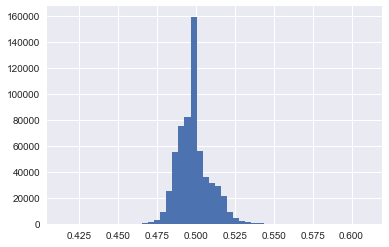

In [37]:
plt.hist(pred, bins = 50)
plt.show()

In [33]:
test

,Close_Price,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2020-05-04 13:27:00,1.09264,0.00032,1,-0.00019,-2.33953,-0.00032,0.00108,-0.00001,0.00013,0.00000,...,-0.00017,-0.00008,-0.00014,-0.00016,-0.00021,0.00012,0.00012,0.00012,0.00012,0.00012
2020-05-04 13:28:00,1.09278,0.00013,1,-0.00021,-1.81127,-0.00045,0.00091,0.00007,0.00013,1.00000,...,-0.00001,-0.00017,-0.00008,-0.00014,-0.00016,0.00013,0.00012,0.00012,0.00012,0.00012
2020-05-04 13:29:00,1.09265,-0.00012,0,-0.00022,-2.06270,-0.00033,0.00103,0.00011,0.00013,1.00000,...,0.00007,-0.00001,-0.00017,-0.00008,-0.00014,0.00013,0.00013,0.00012,0.00012,0.00012
2020-05-04 13:30:00,1.09256,-0.00008,0,-0.00024,-2.16296,-0.00025,0.00111,-0.00002,0.00012,0.00000,...,0.00011,0.00007,-0.00001,-0.00017,-0.00008,0.00013,0.00013,0.00013,0.00012,0.00012
2020-05-04 13:31:00,1.09237,-0.00017,0,-0.00025,-2.46147,-0.00007,0.00128,-0.00013,0.00013,0.00000,...,-0.00002,0.00011,0.00007,-0.00001,-0.00017,0.00012,0.00013,0.00013,0.00013,0.00012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 23:55:00,1.13244,-0.00002,0,-0.00013,0.33169,-0.00035,0.00019,-0.00001,0.00006,0.00000,...,0.00000,0.00003,0.00006,0.00012,0.00009,0.00007,0.00008,0.00008,0.00008,0.00008
2021-12-30 23:56:00,1.13233,-0.00010,0,-0.00014,-0.23506,-0.00026,0.00028,-0.00004,0.00006,0.00000,...,-0.00001,0.00000,0.00003,0.00006,0.00012,0.00006,0.00007,0.00008,0.00008,0.00008
2021-12-30 23:57:00,1.13232,-0.00001,0,-0.00014,-0.27696,-0.00025,0.00029,-0.00004,0.00006,0.00000,...,-0.00004,-0.00001,0.00000,0.00003,0.00006,0.00006,0.00006,0.00007,0.00008,0.00008


In [34]:
test_s = (test - mu) / std # standardization of test set features (with train set parameters!!!)

In [35]:
DNN.evaluate(test_s[cols], test["dir"])

18829/18829 [==============================] - 9s 472us/step - loss: 0.6923 - accuracy: 0.5260


[0.6922506093978882, 0.5259601473808289]

In [36]:
pred = DNN.predict(test_s[cols])
pred

array([[0.5278203 ],
       [0.50855076],
       [0.5105324 ],
       ...,
       [0.4997562 ],
       [0.49870715],
       [0.49906287]], dtype=float32)

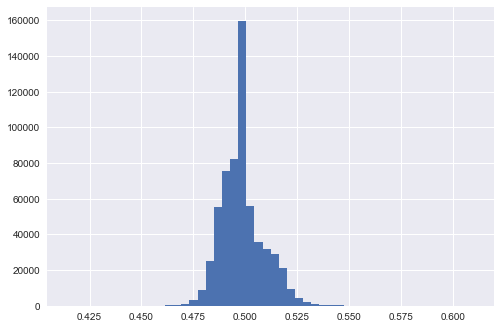

In [92]:
plt.hist(pred, bins = 50);

In [93]:
test["proba"] = DNN.predict(test_s[cols])

In [94]:
test["position"] = np.where(test.proba < 0.47, -1, np.nan) # 1. short where proba < 0.47

In [95]:
test["position"] = np.where(test.proba > 0.53, 1, test.position) # 2. long where proba > 0.53

In [96]:
test.index = test.index.tz_localize("UTC")
test["NYTime"] = test.index.tz_convert("America/New_York")
test["hour"] = test.NYTime.dt.hour

In [97]:
test["position"] = np.where(~test.hour.between(2, 12), 0, test.position) # 3. neutral in non-busy hours

In [98]:
test["position"] = test.position.ffill().fillna(0) # 4. in all other cases: hold position

In [99]:
test.position.value_counts(dropna = False)

0.00000     409670
1.00000     166509
-1.00000     26321
Name: position, dtype: int64

In [100]:
test["strategy"] = test["position"] * test["returns"]

In [101]:
test["creturns"] = test["returns"].cumsum().apply(np.exp)
test["cstrategy"] = test["strategy"].cumsum().apply(np.exp)

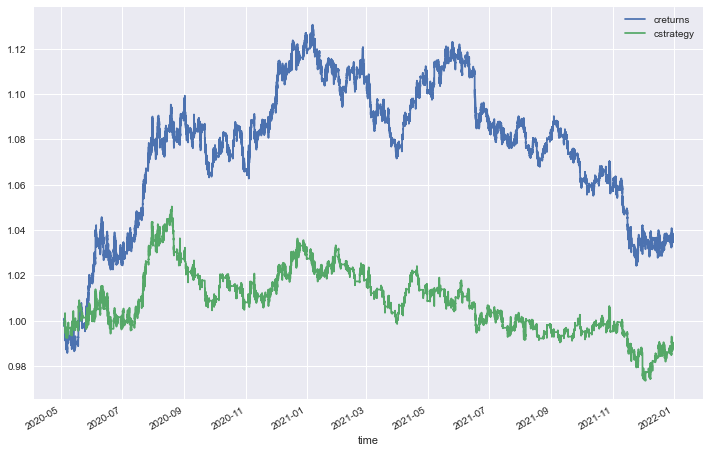

In [102]:
test[["creturns", "cstrategy"]].plot(figsize = (12, 8))
plt.show()

In [103]:
ptc = 0.000059

In [104]:
test["trades"] = test.position.diff().abs()

In [105]:
test.trades.value_counts()

0.00000    601573
1.00000       786
2.00000       140
Name: trades, dtype: int64

In [106]:
test["strategy_net"] = test.strategy - test.trades * ptc

In [107]:
test["cstrategy_net"] = test["strategy_net"].cumsum().apply(np.exp)

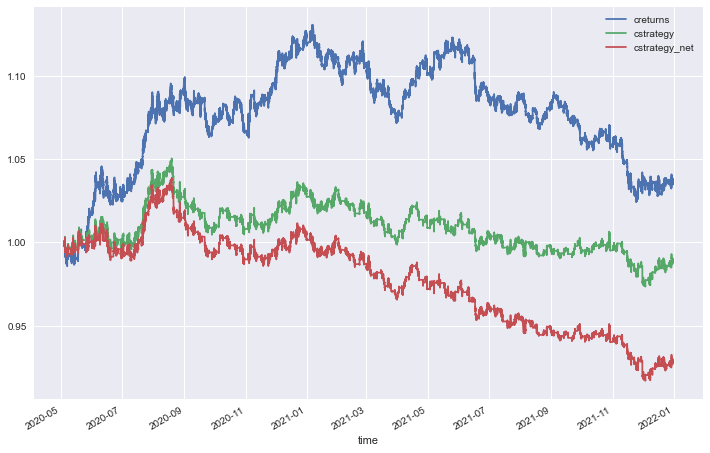

In [108]:
test[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12, 8))
plt.show()

In [ ]:
std

In [ ]:
model.save("DNN_model")

In [28]:
import pickle

In [29]:
params = {"mu":mu, "std":std}

In [43]:
mu.to_csv('mu.csv')
std.to_csv('std.csv')

In [46]:
pickle.dump(params, open("params.pkl", "wb"))

In [49]:
mud = pickle.load(open("params.pkl", "rb"))

In [51]:
mud['mu']

Close_Price    1.13969
returns        0.00000
dir            0.47044
sma            0.00000
boll           0.00209
min           -0.00051
max            0.00051
mom            0.00000
vol            0.00011
dir_lag_1      0.47044
dir_lag_2      0.47044
dir_lag_3      0.47044
dir_lag_4      0.47044
dir_lag_5      0.47044
sma_lag_1      0.00000
sma_lag_2      0.00000
sma_lag_3      0.00000
sma_lag_4      0.00000
sma_lag_5      0.00000
boll_lag_1     0.00209
boll_lag_2     0.00210
boll_lag_3     0.00210
boll_lag_4     0.00211
boll_lag_5     0.00211
min_lag_1     -0.00051
min_lag_2     -0.00051
min_lag_3     -0.00051
min_lag_4     -0.00051
min_lag_5     -0.00051
max_lag_1      0.00051
max_lag_2      0.00051
max_lag_3      0.00051
max_lag_4      0.00051
max_lag_5      0.00051
mom_lag_1      0.00000
mom_lag_2      0.00000
mom_lag_3      0.00000
mom_lag_4      0.00000
mom_lag_5      0.00000
vol_lag_1      0.00011
vol_lag_2      0.00011
vol_lag_3      0.00011
vol_lag_4      0.00011
vol_lag_5  